In [22]:
import numpy as np
import matplotlib.pyplot as plt
from utility_functions import plot_data, get_decision_boundary, plot_decision_boundary
%matplotlib inline

In [23]:
ex2data1 = np.loadtxt("data/ex2data1.txt", delimiter=",")

exam_1_score = ex2data1[:, 0]
exam_2_score = ex2data1[:, 1]

X = ex2data1[:, :2]
y = ex2data1[:, -1]

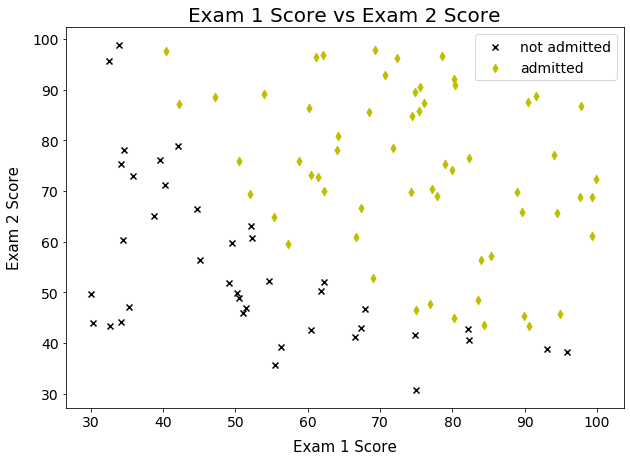

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
negatives = ex2data1[ex2data1[:, -1] == 0]
positives = ex2data1[ex2data1[:, -1] == 1]

ax.set_xlabel("Exam 1 Score", fontsize=15, labelpad=10)
ax.set_ylabel("Exam 2 Score", fontsize=15, labelpad=10)
ax.set_title("Exam 1 Score vs Exam 2 Score", fontsize=20)
ax.tick_params(labelsize=14)

plot_data(ax, negatives[:, 0], negatives[:, 1], param_dict={"c": "black", "marker": "x", "label": "not admitted"})
plot_data(ax, positives[:, 0], positives[:, 1], param_dict={"c": "y", "marker": "d", "label": "admitted"})
ax.legend(prop={'size': 14});

In [25]:
class LogisticRegression:
    

    def __init__(self,
                 X,
                 y,
                 alfa=0.001,
                 num_iter=100000,
                 fit_intercept=True,
                 weights_to_initialise=0,
                 verbose=True):

        self.X = X
        self.y = y.reshape(len(y), 1)

        self._fit_intercept = fit_intercept
        self._alfa = alfa
        self._num_iter = num_iter
        self._m = X.shape[0]
        self._n = (X.shape[1] + 1) if fit_intercept else len(X.shape[1])

        self.thetas = None
        self._temp_thetas = None
        self._verbose = verbose
        
        self._add_constant()
        self._initalise_θ(weights_to_initialise)


    def _add_constant(self):
        if self._fit_intercept:
            constants = np.ones((self._m, 1))
            self.X = np.concatenate((constants, self.X), axis=1)


    def _initalise_θ(self, weight_to_initialise):
        self.thetas = np.zeros(
            self._n
        ) + weight_to_initialise
        self._temp_thetas = self.thetas


    def sigmoid(self, z):
        return (1 / (1 + np.exp(-z)))


    def _h(self):
        z = (self.X @ self.thetas.reshape(-1, 1))
        return self.sigmoid(z)


    def _calculate_cost(self):
        epsilon = 1e-5 # to silence the "RuntimeWarning: divide by zero encountered in log" errors
        h = self._h()
        return np.mean(-1 * (
            (self.y) * np.log(h + epsilon)
            + (1 - self.y) * np.log(1 - h + epsilon)
        ))


    def _gradient(self):
        h = self._h()
        return ((1 / self._m) * self.X.T @ (h - self.y)).flatten()


    def fit(self):
        for i in range(self._num_iter):
            self.thetas -= self._alfa * self._gradient()
            if (self._verbose) and (i % 50000 == 0):
                print(f"COST: {self._calculate_cost()}")
                print(self.thetas)


    def predict_prob(self):
        return self.sigmoid(log.X @ log.thetas)


    def predict_prob_single_instance(self, index):
        prob_matrix = self.sigmoid(log.X @ log.thetas)
        
        exam_scores = f"Exam Score 1: %.3f\nExam Score 2: %.3f" % (self.X[index, 1], self.X[index, 2])
        probability = "Probability of Being Admitted: %.2f%%" % (prob_matrix[index] * 100)
        print(exam_scores); print(probability)


    def predict(self):
        probabilities = self.predict_prob()
        probabilities[probabilities > 0.5] = 1
        probabilities[probabilities <= 0.5] = 0
        return probabilities

In [26]:
#COST: 0.20348330288326974
#WEIGHTS: -25.16133356   0.20623171   0.2014716
log = LogisticRegression(X,
                         y,
                         alfa=0.001,
                         num_iter=1,
                         weights_to_initialise=[-25.16133356, 0.20623171, 0.2014716])

In [27]:
log.fit()

COST: 0.2034833028835238
[-25.16133356   0.20623171   0.2014716 ]


In [28]:
log.predict_prob_single_instance(25)

Exam Score 1: 62.271
Exam Score 2: 69.954
Probability of Being Admitted: 85.50%


# Plotting the Decision Boundary

Please refer to [link](https://datascience.stackexchange.com/questions/49573/how-to-plot-logistic-regression-decision-boundary)  for deriving the decision boundary equation.

----

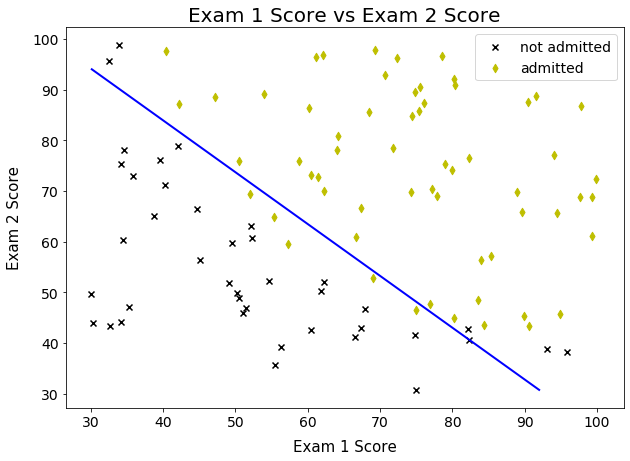

In [30]:
fig, ax = plt.subplots(figsize=(10,7))

# Divide the dataset as negatives and positives.
negatives = ex2data1[ex2data1[:, -1] == 0]
positives = ex2data1[ex2data1[:, -1] == 1]

# Make the plot pretty.
ax.set_xlabel("Exam 1 Score", fontsize=15, labelpad=10)
ax.set_ylabel("Exam 2 Score", fontsize=15, labelpad=10)
ax.set_title("Exam 1 Score vs Exam 2 Score", fontsize=20)
ax.tick_params(labelsize=14)

# Plot both negative and positive classes to the same figure.
plot_data(ax, negatives[:, 0], negatives[:, 1], param_dict={"c": "black", "marker": "x", "label": "not admitted"})
plot_data(ax, positives[:, 0], positives[:, 1], param_dict={"c": "y", "marker": "d", "label": "admitted"})
ax.legend(prop={'size': 14});

# Get the decision boundary and plot it within the same figure.
xx1, xx2, h = get_decision_boundary(X, log.thetas)
ax.contour(xx1, xx2, h, [0.5], linewidths=2, colors="blue");